In [3]:
import pandas as pd
import os
import plotly.express as px 
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt
import squarify
import pygal 
import seaborn as sns 
import plotly.graph_objects as go
from itertools import repeat

In [4]:
pwd

'/Users/irawati'

In [5]:
mumdeeds= pd.read_csv('/Users/Irawati/Desktop/mum_deeds.csv')
mumdeeds['doc_name_eng'].fillna("Deed type unclear", inplace = True) #replaces na values with text
mumdeeds

,doc_name_eng,district_eng,Count
0,1-Acknowledgement/Possession Receipt,Mumbai Suburban,57
1,1-Acknowledgement/Possession Receipt,Raigad,1
2,35-Compensation Bond,Mumbai,1090
3,35-Compensation Bond,Mumbai Suburban,2043
4,35-Compensation Bond,Palghar,30
...,...,...,...
534,Deed type unclear,Mumbai,36742
535,Deed type unclear,Mumbai Suburban,159160
536,Deed type unclear,Palghar,85659
537,Deed type unclear,Raigad,55442


In [6]:
mumbai = mumdeeds[mumdeeds.district_eng == 'Mumbai']
mumbai.sort_values(by=['Count'], inplace=True, ascending=False)
mumbai.drop(mumbai.tail(99).index,inplace=True)
mumbai= mumbai.set_index('doc_name_eng')

<ipython-input-6-58d53ff0a06b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai.sort_values(by=['Count'], inplace=True, ascending=False)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


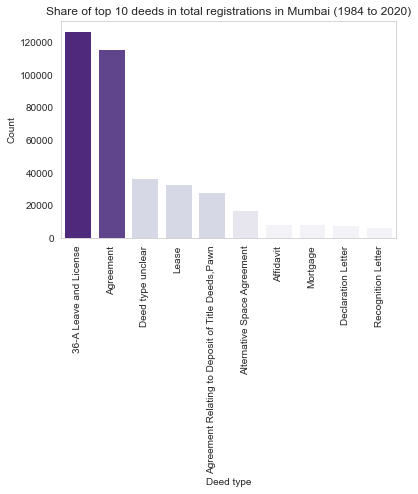

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
def colors_from_values(values, Purples):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(mumbai.Count) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(Purples, len(mumbai.Count))
    return np.array(palette).take(indices, axis=0)

x = np.arange(10)
y = np.random.random(10)

Mumbai=sns.barplot(mumbai.index, mumbai.Count, palette=colors_from_values(mumbai.Count, "Purples")).set_title('Share of top 10 deeds in total registrations in Mumbai (1984 to 2020)')
plt.xticks(rotation=90)
plt.xlabel("Deed type")
plt.savefig ('Share of Top Ten Mumbai Deeds_Seaborn.png', bbox_inches='tight')